In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import time
import h5py
import os,sys
import numpy as np
import matplotlib.pyplot as plt

In [3]:
DSPACK_HOME=os.environ.get("DSPACK_HOME")
if DSPACK_HOME not in sys.path:
    sys.path.append(DSPACK_HOME)

In [4]:
import scripts.fsystem
import scripts.statistics

In [5]:
workdir = "/reg/data/ana03/scratch/zhensu/Experiment/ICH/20201225/"
dnames = ["WT-1", "WT-2", "WT-3", "G150A-1", "G150A-2", "G150A-3", "G150T-1", "G150T-2", "G150T-3"]

In [7]:
stats = {}
for idx,dname in enumerate(dnames):
    path_dsdata = "%s/data/%s/standard_clean_data_scale_profile_with_pca_map1.dsdata"%(workdir,dname)
    path_volume = scripts.fsystem.H5manager.reader(path_dsdata,"merge_volume")
    with h5py.File(path_volume, "r") as f:
        weight = f["weight"][()]
        Amat_invA = f["Amat_invA"][()]
    
    """
    path_image = scripts.fsystem.H5manager.reader(path_dsdata,"image_file")[0]
    with h5py.File(path_image, "r") as f:
        lattice_constant = f["lattice_constant_A_deg"][()]
    """
    path_pdb = scripts.fsystem.H5manager.reader(path_dsdata,"pdb_refmac5")
    lattice_constant = scripts.statistics.get_pdb_lattice_from_file(path_pdb)[:6]
    
    x = np.arange(121)-60
    H,K,L = np.meshgrid(x,x,x,indexing="ij")
    astar = Amat_invA[:,0]
    bstar = Amat_invA[:,1]
    cstar = Amat_invA[:,2]
    r_invA = np.sqrt((H*astar[0] + K*bstar[0] + L*cstar[0])**2 + \
                     (H*astar[1] + K*bstar[1] + L*cstar[1])**2 + \
                     (H*astar[2] + K*bstar[2] + L*cstar[2])**2 )
    
    high_res_A = 1.4
    low_res_A  = 1./np.amin(r_invA[weight>=4]) + 1e-5
    x_array_invA = np.linspace(1./low_res_A, 1./high_res_A, 21)
    
    array_weight = np.zeros(20)
    array_resolution_invA = np.zeros(20)
    for i in range(20):
        start_invA = x_array_invA[i]
        stop_invA = x_array_invA[i+1]
        array_weight[i] = np.mean(weight[(weight>=4)&(r_invA>start_invA)&(r_invA<=stop_invA)])
        array_resolution_invA[i] = (start_invA+stop_invA)/2.
        
    stats[dname] = (array_resolution_invA, array_weight)

In [8]:
colors = ["tab:blue","tab:orange","tab:green","tab:red","tab:purple",\
          "tab:brown","tab:pink","tab:gray","tab:olive","tab:cyan"]
resolution_A = np.around(1./np.linspace(0.1,1./1.4,5),1)

dpi =  600


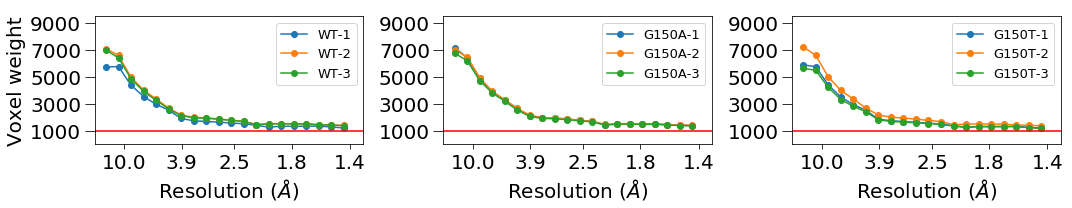

In [9]:
plt.figure(figsize=(15,3))

####################################
plt.subplot(1,3,1)
for idx, dname in enumerate(dnames[0:3]):
    plt.plot(10*stats[dname][0], stats[dname][1], "-o",label=dname,c=colors[idx])

plt.legend(loc=1,fontsize=13)
plt.xlim(0.2,7.5)
plt.ylim(0.,9500)
plt.xlabel("Resolution ($\AA$)",fontsize=20)
plt.ylabel("Voxel weight",fontsize=20)
plt.xticks(10./resolution_A, resolution_A,fontsize=20)
plt.yticks(np.arange(1000,9001,2000),np.arange(1000,9001,2000), fontsize=20)
plt.tick_params('y', length=10,  which='major')
plt.tick_params('x', length=5, which='major')
plt.axhline(y=1000,color="red")
plt.tight_layout()
####################################
plt.subplot(1,3,2)
for idx, dname in enumerate(dnames[3:6]):
    plt.plot(10*stats[dname][0], stats[dname][1], "-o",label=dname,c=colors[idx])
    
plt.legend(loc=1,fontsize=13)
plt.xlim(0.2,7.5)
plt.ylim(0.,9500)
plt.xlabel("Resolution ($\AA$)",fontsize=20)
plt.xticks(10./resolution_A, resolution_A,fontsize=20)
plt.yticks(np.arange(1000,9001,2000),np.arange(1000,9001,2000), fontsize=20)
plt.tick_params('y', length=10,  which='major')
plt.tick_params('x', length=5, which='major')
plt.axhline(y=1000,color="red")
plt.tight_layout()
####################################
plt.subplot(1,3,3)
for idx, dname in enumerate(dnames[6:9]):
    plt.plot(10*stats[dname][0], stats[dname][1], "-o",label=dname,c=colors[idx])
    
plt.legend(loc=1,fontsize=13)
plt.xlim(0.2,7.5)
plt.ylim(0.,9500)
plt.xlabel("Resolution ($\AA$)",fontsize=20)
plt.xticks(10./resolution_A, resolution_A,fontsize=20)
plt.yticks(np.arange(1000,9001,2000),np.arange(1000,9001,2000), fontsize=20)
plt.tick_params('y', length=10,  which='major')
plt.tick_params('x', length=5, which='major')
plt.axhline(y=1000,color="red")
plt.tight_layout()
#####################################

fig = plt.gcf()
max_fit_dpi = min(int(np.sqrt(25.*1024**2/np.prod(fig.get_size_inches()))),600)
print "dpi = ", max_fit_dpi
plt.tight_layout()
plt.savefig("./600dpi/Fig_S03_Voxel_Merging_Weight.jpg",dpi=600,bbox_inches='tight',pad_inches=0,transparent=True)
plt.savefig("./fitgdoc/Fig_S03_Voxel_Merging_Weight.jpg",dpi=max_fit_dpi,bbox_inches='tight',pad_inches=0,transparent=True)
plt.show()

### Minimum averaged voxel weight

In [10]:
for idx,dname in enumerate(dnames):
    print int(np.amin(stats[dname][1]))

1206
1397
1393
1386
1414
1372
1210
1374
1185


### Warning: The average weight only considers voxels with weight, it will ignore the voxels without anything assigned.